In [27]:
import pandas as pd
import numpy as np
import sklearn
import pickle 
import time 
import datetime
import warnings
import matplotlib.pyplot as plt
import torch
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import graft
import torch_geometric


In [23]:
with open('./fraudTrain.pkl', 'rb') as file:
    fraudTrain = pickle.load(file)    

In [3]:
df_test = pd.read_csv('~/Dropbox/Data/df_test.csv')

In [4]:
df = df_test[df_test['amt'] <= 80]
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-10-12 18:21:00,4.089100e+18,"fraud_Haley, Jewess and Bechtelar",shopping_pos,7.53,Debra,Stark,F,686 Linda Rest,Kilgore,...,32.3836,-94.8653,24536,Multimedia programmer,1983-10-14,d313353fa30233e5fab5468e852d22fc,1350066071,32.202008,-94.371865,0
1,2019-01-20 13:06:00,4.247920e+12,fraud_Turner LLC,travel,3.79,Judith,Moss,F,46297 Benjamin Plains Suite 703,Washington Court House,...,39.5370,-83.4550,22305,Television floor manager,1939-03-09,88c65b4e1585934d578511e627fe3589,1327064760,39.156673,-82.930503,0
2,2019-03-24 18:09:00,4.026220e+12,fraud_Klein Group,entertainment,59.07,Debbie,Payne,F,204 Ashley Neck Apt. 169,Preston,...,41.5224,-71.9934,4720,Broadcast presenter,1977-05-18,3bd9ede04b5c093143d5e5292940b670,1332612553,41.657152,-72.595751,0
3,2020-02-25 15:12:00,4.957920e+12,fraud_Monahan-Morar,personal_care,25.58,Alan,Parsons,M,0547 Russell Ford Suite 574,Kirk,...,39.6171,-102.4776,207,Network engineer,1955-12-04,19e16ee7a01d229e750359098365e321,1361805120,39.080346,-103.213452,0
5,2020-01-17 12:52:00,4.328930e+15,fraud_Stoltenberg-Beatty,shopping_pos,20.59,Margaret,Ray,F,927 Cummings Manor Suite 318,Greendale,...,42.9373,-87.9943,13973,Logistics and distribution manager,1981-05-06,5c09ec083ce8e0a02fa257ceaaffd89c,1358427176,43.804237,-87.715986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314538,2019-07-22 13:00:00,4.917190e+15,"fraud_Hintz, Bauch and Smith",health_fitness,19.68,Joel,Rivera,M,121 Solis Summit Apt. 934,Tryon,...,35.8759,-96.9623,1165,"Psychotherapist, child",1944-11-11,5d9b81a4b1794d8db7ff312c4f4aa8d6,1342962031,36.631112,-97.721885,1
314558,2019-04-29 03:58:00,3.423510e+14,fraud_Gutmann Ltd,grocery_net,12.43,Rebecca,Obrien,F,5619 Mendoza Inlet,Juliette,...,33.1194,-83.8235,3343,Theatre manager,1990-06-08,d5bec8b265bbb126192d85a3644f47d2,1335671882,33.237073,-84.155467,1
314563,2019-04-25 23:24:00,3.556610e+15,fraud_Kautzer and Sons,personal_care,20.51,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,5191b149131485051f020c0f67a87523,1335396296,29.871618,-95.823992,1
314566,2020-01-04 23:23:00,3.523840e+15,fraud_Parker-Kunde,personal_care,17.83,Grace,Williams,F,28812 Charles Mill Apt. 628,Plantersville,...,32.6176,-86.9475,1412,Drilling engineer,1970-11-20,bde542653fff0ccfa1196af32a374b66,1357341838,33.054015,-87.130221,1


In [5]:
cc_amt_80 = list(set(df['cc_num']))

<Axes: >

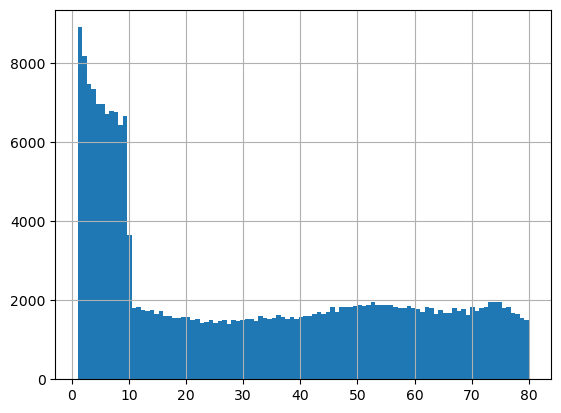

In [6]:
df['amt'].hist(bins=100)

In [8]:
df_fraud = df[df.is_fraud == 1]
df_fraud_cc = list(set(df_fraud['cc_num']))

In [9]:
df2 = df[df['cc_num'].isin(df_fraud_cc)]

In [13]:

df2 = df[df['cc_num'].isin(df_fraud_cc)].reset_index()
df_group = df2.groupby("cc_num")["is_fraud"].agg(['count', 'sum']).reset_index()
df_group.columns = ['cc_num', 'total_transactions', 'fraud_transactions']
first = df2.groupby('cc_num')['first'].first().reset_index() 
last = df2.groupby('cc_num')['last'].first().reset_index()
name = first['first'] + ' ' + last['last']
df_group['name'] = name
df_group.insert(1, 'name', df_group.pop('name'))
df_group

,cc_num,name,total_transactions,fraud_transactions
0,6.041621e+10,Mary Diaz,299,1
1,6.042293e+10,Jeffrey Powers,250,1
2,6.042310e+10,Jason Gray,94,2
3,5.018510e+11,Sydney Morales,1,1
4,5.018990e+11,Jessica Dominguez,280,2
...,...,...,...,...
265,4.769430e+18,Andrea Cruz,352,1
266,4.906630e+18,Charles Moreno,521,1
267,4.911820e+18,Jeremy Chavez,1,1
268,4.956830e+18,Kenneth Robinson,509,1


In [19]:
df_group.to_csv('df_group.csv', index=False)

In [52]:
def compute_time_difference(group):
    n = len(group)
    result = []
    for i in range(n):
        for j in range(n):
            time_difference = abs(group.iloc[i].trans_date_trans_time.value - group.iloc[j].trans_date_trans_time.value)
            result.append([group.iloc[i].name, group.iloc[j].name, time_difference])
    return result


In [20]:
c_sample = 6502200000000000

In [28]:
groups = df[df['cc_num'] == c_sample]
def compute_time_difference(group):
    n = len(group)
    result = []
    for i in range(n):
        for j in range(n):
            time_difference = abs(group.iloc[i].trans_date_trans_time.value - group.iloc[j].trans_date_trans_time.value)
            result.append([group.iloc[i].name, group.iloc[j].name, time_difference])
    return result

edge_index = compute_time_difference(groups)
edge_index = (np.array(edge_index)).astype(np.float64)
edge_index = np.array(edge_index)[np.array(edge_index)[:,0] != np.array(edge_index)[:,1]]
theta = edge_index[:,2].mean()
edge_index[:,2] = (np.exp(-edge_index[:,2]/theta)!= 1)*(np.exp(-edge_index[:,2]/theta))
edge_index = edge_index.tolist()
selected_indices1 = df[df['cc_num'] ==  c_sample].index
is_fraud_values1 = df.loc[selected_indices1, 'is_fraud'].tolist()
g = torch_geometric.data.Data(
    edge_index = np.array(edge_index)[:,:2],
    edge_attr = np.array(edge_index)[:,-1],  # weight
    x = df.loc[selected_indices1, 'amt'].tolist(),
    y = df.loc[selected_indices1, 'is_fraud'].tolist()
)



unique_nodes = set(g.edge_index.reshape(-1).tolist())
dict_map = {n:i for i,n in enumerate(unique_nodes)}
source, target = np.array(edge_index)[:,0], np.array(edge_index)[:,1]
edge_index_selected2 = torch.tensor([[dict_map[s] for s in source.tolist()],[dict_map[t] for t in target.tolist()]])

g = torch_geometric.data.Data(
    edge_index = edge_index_selected2,
    edge_attr = np.array(edge_index)[:,-1],
    x = df.loc[selected_indices1, 'amt'].tolist(),
    y = df.loc[selected_indices1, 'is_fraud'].tolist()
)

dr_opts = { 
    'output_size': (500,500),
    'edge_marker_size': 1,
    #'output':"ten-nodes.pdf",
}




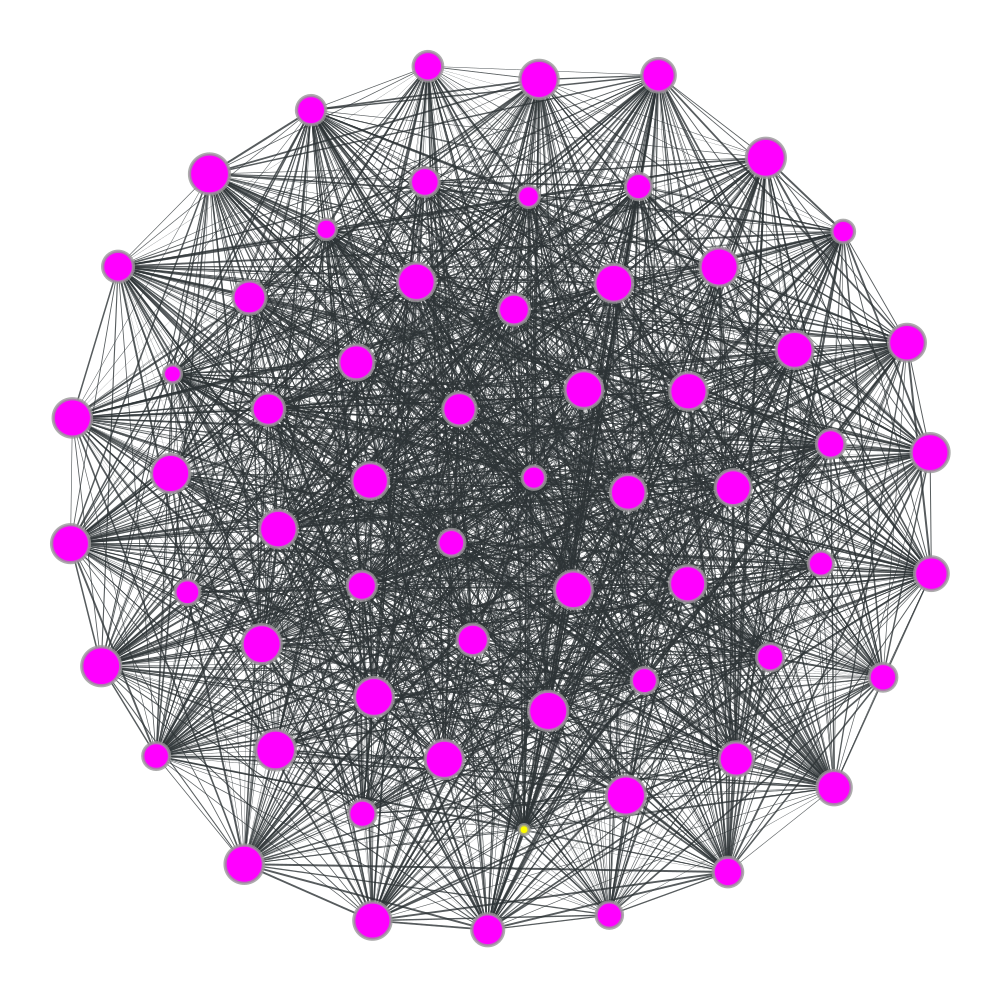

In [29]:
graft.graph.plot_undirected_weighted(
    g,
    node_color=g.y,
    node_size=g.x,
    edge_weight_text=False,
    draw_options= dr_opts,
)


?... 이게....아닌거 같은뎀...